In [14]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

## Reading the Data

In [2]:
df = pd.read_csv("car_price_dataset.csv")
df.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [3]:
df.shape

(205, 26)

In [4]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


 - Take only company name from **"CarName"** column

In [5]:
Company = df['CarName'].apply(lambda x : x.split(" ")[0])
df.insert(2,"Company",Company)
df.head(3)

,car_ID,symboling,Company,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,alfa-romero giulia,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,alfa-romero stelvio,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


- Remove **"CarName", "car_ID", "symboling"** columns

In [6]:
df.drop(["CarName", "car_ID", "symboling"], axis=1, inplace=True)
df.head(3)

,Company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [7]:
df.head(3)

,Company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


 - Renaming incorrect companies names in **"Company"** column

In [8]:
print(f"Unique companies names {len(df.Company.str.lower().value_counts())}")
df.Company.str.lower().value_counts()

Unique companies names 27


toyota         31
nissan         18
mazda          15
mitsubishi     13
honda          13
subaru         12
volvo          11
peugeot        11
volkswagen      9
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
jaguar          3
alfa-romero     3
chevrolet       3
vw              2
renault         2
maxda           2
porcshce        1
toyouta         1
mercury         1
vokswagen       1
Name: Company, dtype: int64

In [9]:
df.Company = df.Company.str.lower()
df.Company.replace(
    {
        "alfa-romero":"alfa romeo",
        "maxda":"mazda",
        "vw": "volkswagen",
        "vokswagen":"volkswagen",
        "porcshce": "porsche",
        "toyouta":"toyota",        
    },
    inplace=True
)

In [10]:
print(f"Unique companies names {len(df.Company.str.lower().value_counts())}")
df.Company.str.lower().value_counts()

Unique companies names 22


toyota        32
nissan        18
mazda         17
mitsubishi    13
honda         13
subaru        12
volkswagen    12
peugeot       11
volvo         11
dodge          9
bmw            8
buick          8
plymouth       7
audi           7
saab           6
porsche        5
isuzu          4
chevrolet      3
jaguar         3
alfa romeo     3
renault        2
mercury        1
Name: Company, dtype: int64

### Data visualization

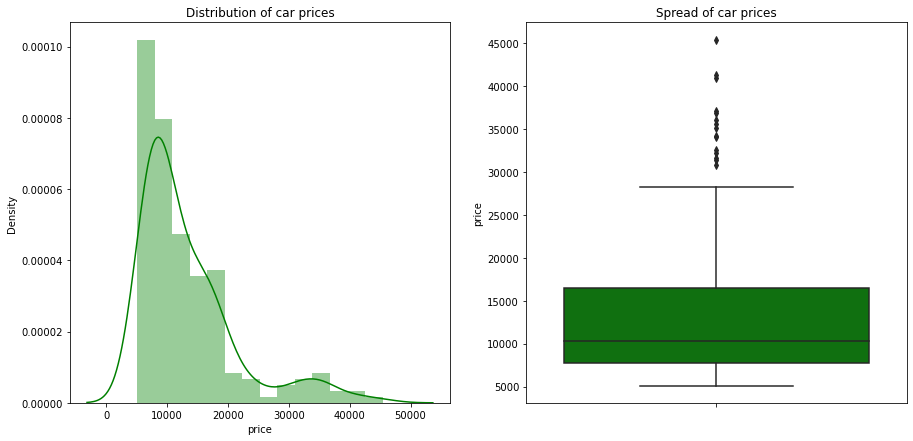

In [11]:
plt.figure(figsize=(15, 7))

plt.subplot(1,2,1)
plt.title('Distribution of car prices')
sns.distplot(df.price, color="g")

plt.subplot(1,2,2)
plt.title('Spread of car prices')
sns.boxplot(y=df.price, color="g")

plt.show()

In [12]:
df.Company.value_counts()

toyota        32
nissan        18
mazda         17
mitsubishi    13
honda         13
subaru        12
volkswagen    12
peugeot       11
volvo         11
dodge          9
bmw            8
buick          8
plymouth       7
audi           7
saab           6
porsche        5
isuzu          4
chevrolet      3
jaguar         3
alfa romeo     3
renault        2
mercury        1
Name: Company, dtype: int64

In [15]:
colors = []
for x in range(40):
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)
    colors.append(color)

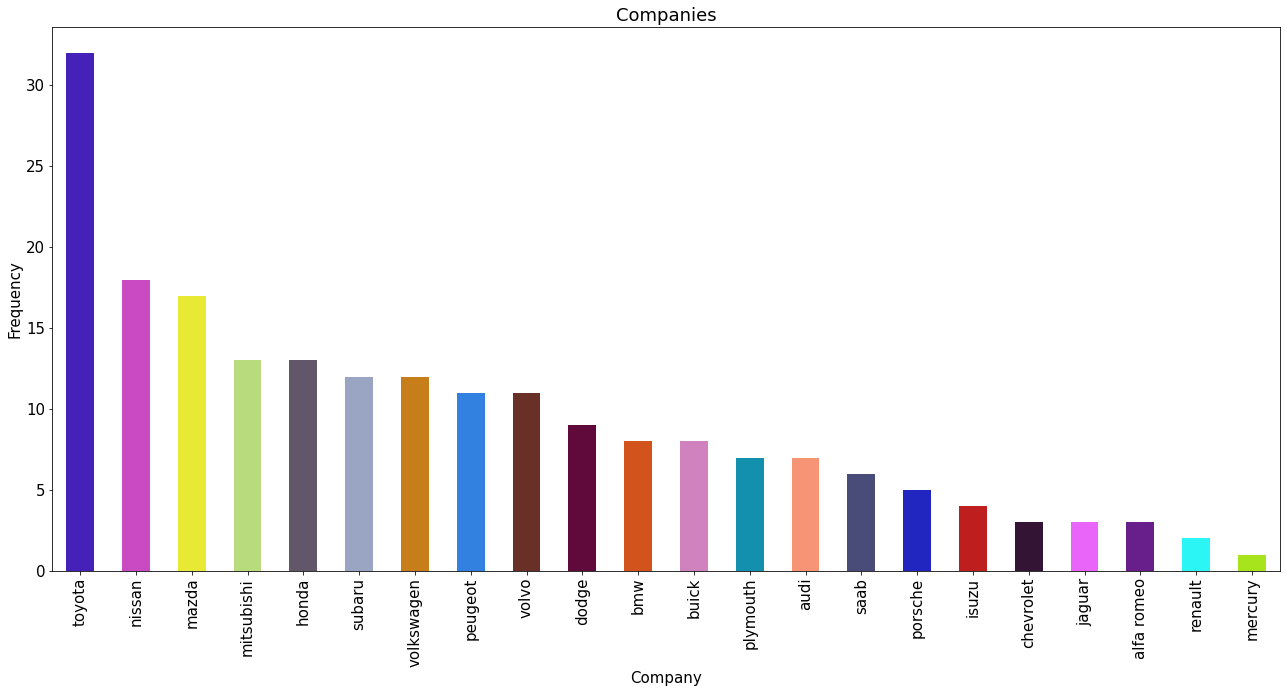

In [26]:
plt.figure(figsize=(22, 10))
plt.rcParams.update({'font.size': 15})
plt1 = df.Company.value_counts().plot(kind='bar', color=colors)
plt.title('Companies')
plt.xlabel("Company")
plt.xticks(rotation=90)
plt.ylabel("Frequency")

plt.show()

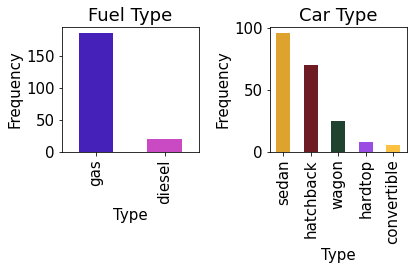

In [42]:
plt.subplot(1, 2, 1)
plt1 = df.fueltype.value_counts().plot(kind='bar', color=colors)
plt.title('Fuel Type')
plt1.set(xlabel = 'Type', ylabel='Frequency')

plt.subplot(1, 2, 2)
plt1 = df.carbody.value_counts().plot(kind='bar', color=reversed(colors))
plt.title('Car Type')
plt1.set(xlabel = 'Type', ylabel='Frequency')

plt.tight_layout()
plt.show()

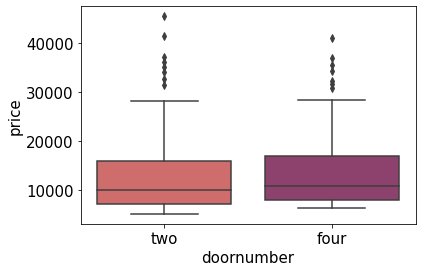

In [51]:
sns.boxplot(x=df.doornumber, y=df.price, palette=('flare'))

plt.show()

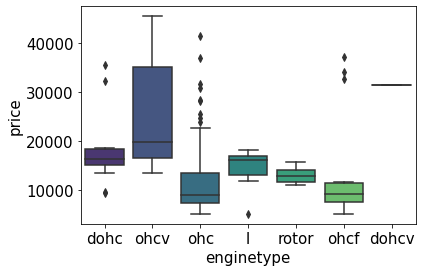

In [50]:
sns.boxplot(x=df.enginetype, y=df.price, palette=('viridis'))

plt.show()

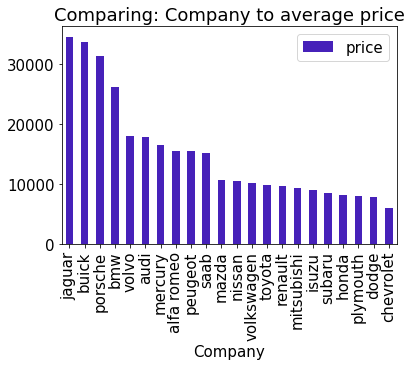

In [47]:
pd.DataFrame(df.groupby(['Company'])['price'].mean(). \
             sort_values(ascending = False)).plot.bar(color=random.choice(colors))
plt.title('Comparing: Company to average price')

plt.show()

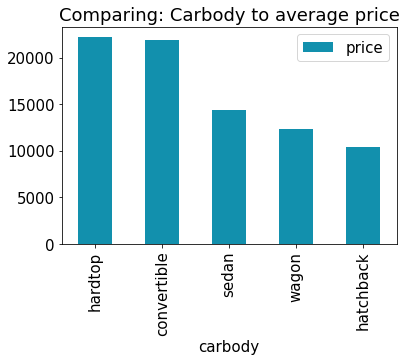

In [52]:
pd.DataFrame(df.groupby(['carbody'])['price'].mean(). \
             sort_values(ascending = False)).plot.bar(color=random.choice(colors))
plt.title('Comparing: Carbody to average price')

plt.show()

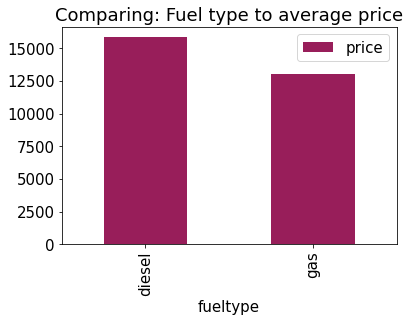

In [53]:
pd.DataFrame(df.groupby(['fueltype'])['price'].mean(). \
             sort_values(ascending = False)).plot.bar(color=random.choice(colors))
plt.title('Comparing: Fuel type to average price')

plt.show()

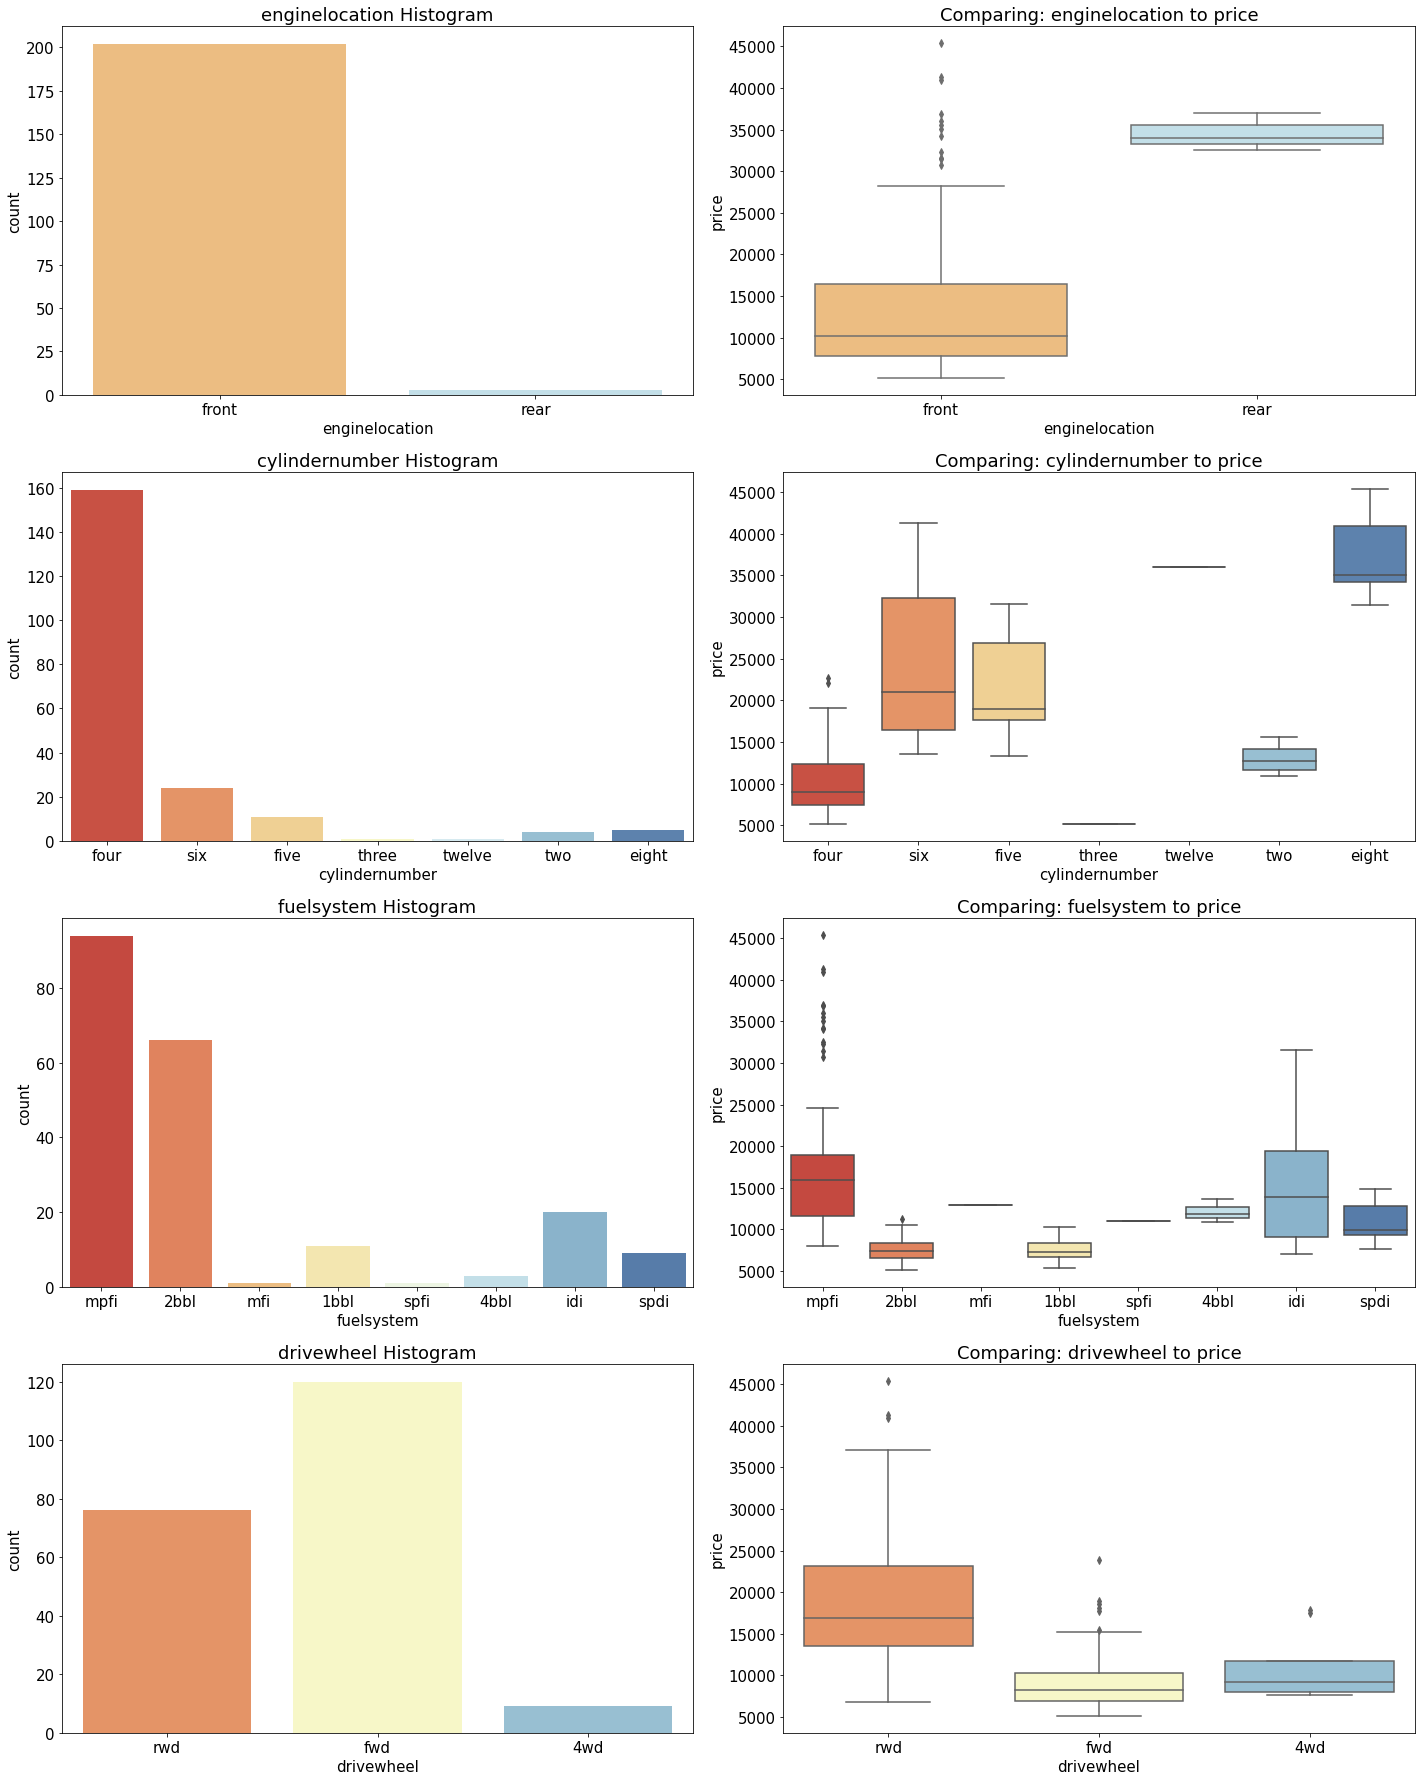

In [56]:
COLOR = "RdYlBu"

def plot_count(feature, fig):
    plt.subplot(4, 2, fig)
    plt.title(feature +' Histogram')
    sns.countplot(df[feature],palette=(COLOR))
    plt.subplot(4,2,(fig+1))
    plt.title(f'Comparing: {feature} to price')
    sns.boxplot(x=df[feature], y=df.price, palette=(COLOR))
    
plt.figure(figsize=(20,25))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()


## Correlation

<AxesSubplot:>

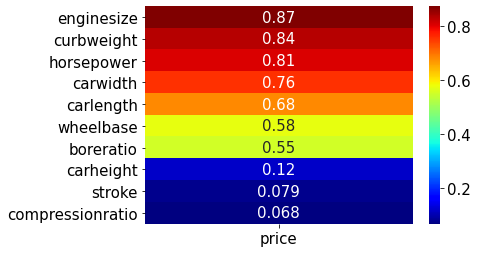

In [63]:
sns.heatmap(df.corr().sort_values(by="price", ascending=False).iloc[1:11,-1:], cmap="jet", annot=True)

In [64]:
strongest_features = df.corr().sort_values(by="price", ascending=False).iloc[:11,:].index
strongest_features

Index(['price', 'enginesize', 'curbweight', 'horsepower', 'carwidth',
       'carlength', 'wheelbase', 'boreratio', 'carheight', 'stroke',
       'compressionratio'],
      dtype='object')

In [65]:
df_for_model = df[strongest_features]
df_for_model

,price,enginesize,curbweight,horsepower,carwidth,carlength,wheelbase,boreratio,carheight,stroke,compressionratio
0,13495.0,130,2548,111,64.1,168.8,88.6,3.47,48.8,2.68,9.0
1,16500.0,130,2548,111,64.1,168.8,88.6,3.47,48.8,2.68,9.0
2,16500.0,152,2823,154,65.5,171.2,94.5,2.68,52.4,3.47,9.0
3,13950.0,109,2337,102,66.2,176.6,99.8,3.19,54.3,3.40,10.0
4,17450.0,136,2824,115,66.4,176.6,99.4,3.19,54.3,3.40,8.0
...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,141,2952,114,68.9,188.8,109.1,3.78,55.5,3.15,9.5
201,19045.0,141,3049,160,68.8,188.8,109.1,3.78,55.5,3.15,8.7
202,21485.0,173,3012,134,68.9,188.8,109.1,3.58,55.5,2.87,8.8
203,22470.0,145,3217,106,68.9,188.8,109.1,3.01,55.5,3.40,23.0


## Scaling each feature

In [71]:
scaled_df = df[strongest_features]
scaled_df

,price,enginesize,curbweight,horsepower,carwidth,carlength,wheelbase,boreratio,carheight,stroke,compressionratio
0,13495.0,130,2548,111,64.1,168.8,88.6,3.47,48.8,2.68,9.0
1,16500.0,130,2548,111,64.1,168.8,88.6,3.47,48.8,2.68,9.0
2,16500.0,152,2823,154,65.5,171.2,94.5,2.68,52.4,3.47,9.0
3,13950.0,109,2337,102,66.2,176.6,99.8,3.19,54.3,3.40,10.0
4,17450.0,136,2824,115,66.4,176.6,99.4,3.19,54.3,3.40,8.0
...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,141,2952,114,68.9,188.8,109.1,3.78,55.5,3.15,9.5
201,19045.0,141,3049,160,68.8,188.8,109.1,3.78,55.5,3.15,8.7
202,21485.0,173,3012,134,68.9,188.8,109.1,3.58,55.5,2.87,8.8
203,22470.0,145,3217,106,68.9,188.8,109.1,3.01,55.5,3.40,23.0


In [72]:
X = scaled_df.iloc[:,1:]
y = scaled_df.price

np.random.seed(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [73]:
sample = X_train.sample().index[0]
X_train.loc[[sample]]

,enginesize,curbweight,horsepower,carwidth,carlength,wheelbase,boreratio,carheight,stroke,compressionratio
174,110,2480,73,66.5,175.6,102.4,3.27,54.9,3.35,22.5


In [74]:
y_train.loc[[sample]].to_frame()

,price
174,10698.0


In [79]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(normalize=True)

In [80]:
pd.DataFrame(model.coef_, index= X.columns, columns=["Factor"])

# for example if enginesize + 1 then price + 73.05

,Factor
enginesize,73.054650
curbweight,2.072149
horsepower,79.556683
carwidth,718.606870
carlength,-67.944794
wheelbase,66.564386
boreratio,-1748.583137
carheight,90.845301
stroke,-2761.915038
compressionratio,191.431438


In [81]:
y_pred = model.predict(X_test)

In [82]:
model.score(X_test, y_test)

0.8085801422976268

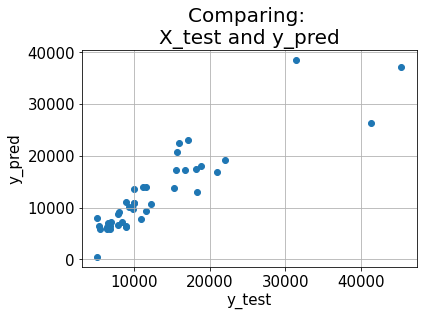

In [92]:

plt.scatter(y_test,y_pred)
plt.title("Comparing: \nX_test and y_pred", fontsize=20)

plt.xlabel('y_test', fontsize=15)
plt.ylabel('y_pred', fontsize=15)

plt.grid()
plt.show()